In [4]:
import numpy as np
import emcee

In [5]:
def lnprob(x, ivar):

    return -0.5 * np.sum( ivar * x ** 2 )

In [6]:
ndim, nwalkers = 10, 100
ivar = 1. / np.random.rand(ndim)
p0 = [np.random.rand(ndim) for i in range(nwalkers)]

In [7]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[ivar])
sampler.run_mcmc(p0, 1000)

(array([[-1.90382971e-01,  1.49532531e+00, -1.07444006e+00,
         -5.35448842e-01, -4.40812226e-01,  1.04628641e+00,
          2.42104604e-01, -5.64919152e-01, -1.28807146e-01,
          6.00844946e-01],
        [-2.38258114e-02,  9.49545579e-01,  8.93288397e-01,
         -1.10284126e-01,  9.52923104e-01,  1.24936307e+00,
         -2.09816796e+00,  5.50119266e-01, -9.29375278e-02,
         -9.62968915e-01],
        [ 8.64774123e-03,  2.27367852e-01, -4.85755158e-01,
          9.75381115e-01, -1.53745390e-01,  2.80900191e-01,
          1.53682138e-01, -5.48123386e-01, -7.67547780e-01,
          4.49655170e-01],
        [-1.24021918e-01,  6.77934880e-01, -3.99705337e-01,
         -1.77110240e-01,  2.34674403e-01,  1.42348694e+00,
          1.27256908e+00,  3.53160977e-01, -5.38937723e-01,
         -1.29104330e-01],
        [ 1.79897715e-02, -6.54753058e-01, -1.08705082e-01,
          1.40266637e-01,  1.85880210e-01,  7.54177174e-01,
         -1.27517298e+00,  9.41665991e-02, -5.064313

In [8]:
import numpy as np
import emcee

In [9]:
def lnprob(x, mu, icov):
    diff = x-mu
    return -np.dot(diff,np.dot(icov,diff))/2.0

In [10]:
ndim = 50

means = np.random.rand(ndim)


cov = 0.5 - np.random.rand(ndim ** 2) .reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)

In [11]:
icov = np.linalg.inv(cov)

In [12]:
nwalkers = 250
p0 = np.random.rand(ndim * nwalkers) .reshape((nwalkers, ndim))

In [13]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means, icov])

In [16]:
lnprob(p , means, icov)

NameError: name 'p' is not defined

In [17]:
pos, prob, state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [18]:
sampler.run_mcmc(pos, 1000)

(array([[ 4.23907153,  1.24225646,  1.12548418, ...,  0.44259552,
         -0.19558607,  5.02637409],
        [ 2.51344432,  0.17622387,  1.27074336, ...,  2.96584236,
         -1.25704212, -0.75189464],
        [ 4.42480928,  2.26358437,  1.08652791, ...,  1.40038239,
          0.77181836,  1.47068006],
        ...,
        [-2.70089394,  0.40969523,  1.77836104, ..., -1.07944614,
         -0.73760799, -1.79897624],
        [ 1.02065802,  2.17725111,  1.55618383, ...,  0.06397754,
         -2.4427831 , -0.60612087],
        [-0.17672106,  0.45425865, -0.24835985, ..., -1.25811793,
          0.02595474,  5.60476089]]),
 array([-21.23829649, -27.12775936, -31.45045707, -27.85000023,
        -24.78592653, -37.45270483, -23.33250999, -23.04944238,
        -20.85135859, -19.74723349, -27.07619454, -20.56868702,
        -24.81014055, -24.80329416, -36.91423988, -22.68404037,
        -19.47771553, -36.35087636, -21.26676937, -28.68841976,
        -28.15910258, -25.32135771, -27.58774108, -19

In [20]:
import matplotlib as plt
plt.rcParams.update({'figure.max_open_warning': 0})

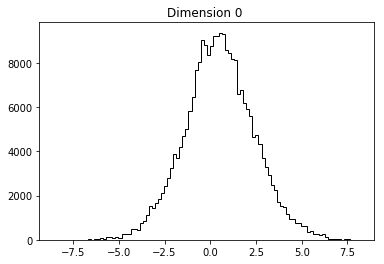

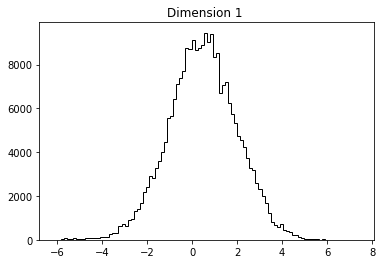

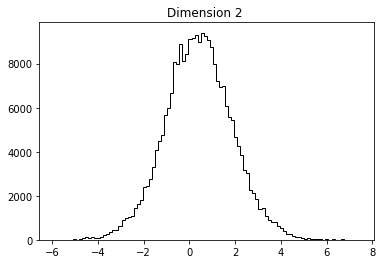

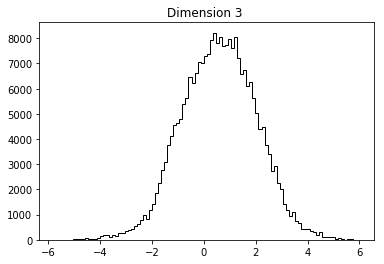

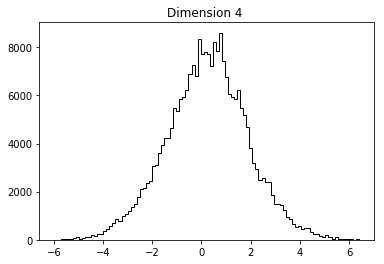

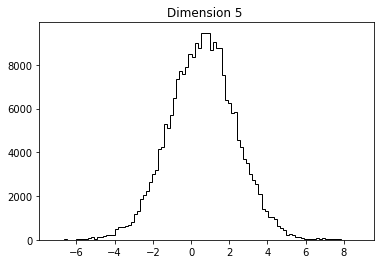

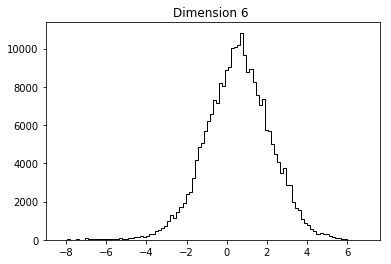

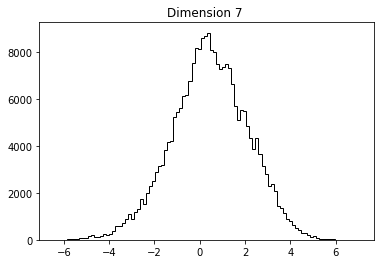

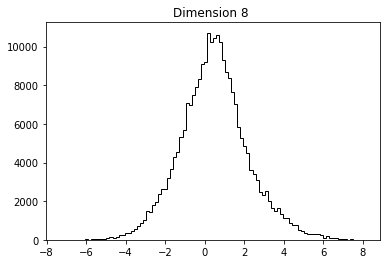

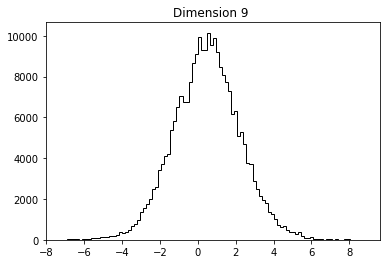

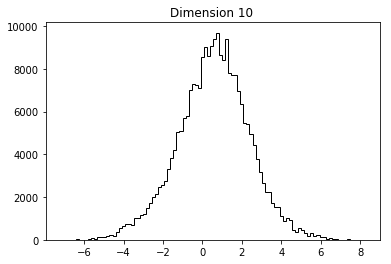

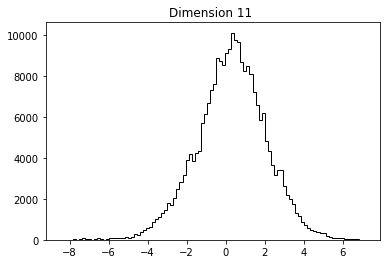

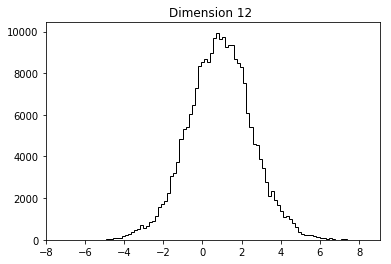

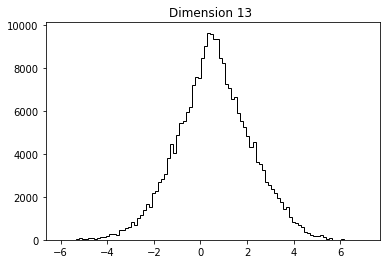

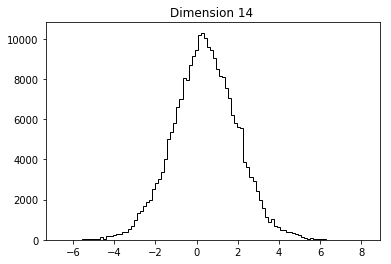

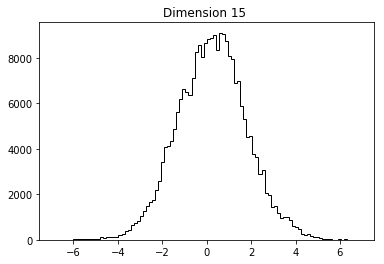

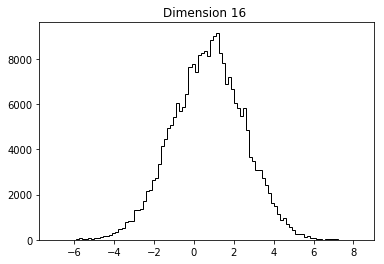

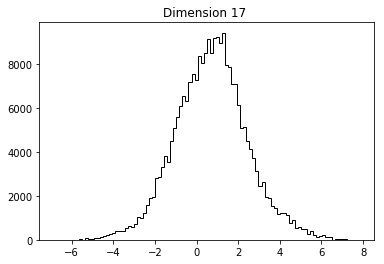

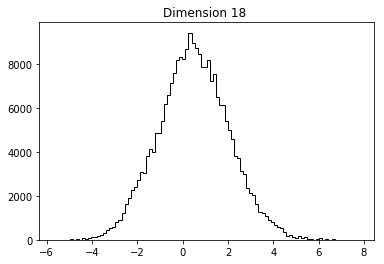

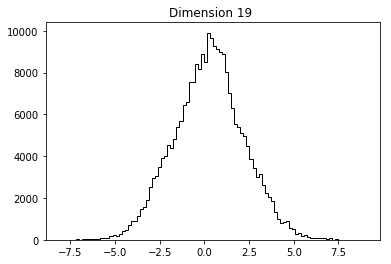

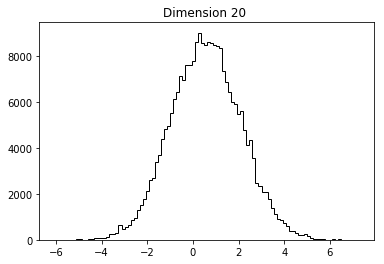

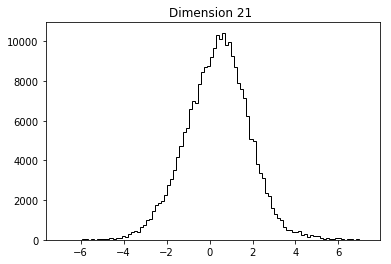

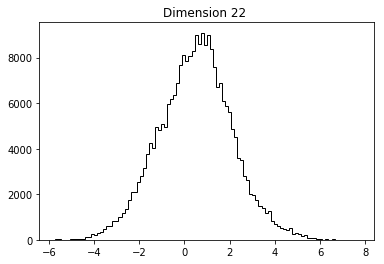

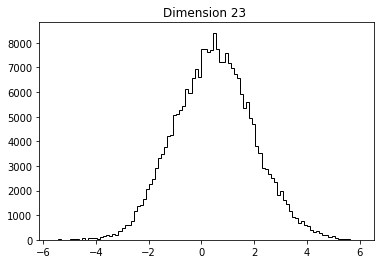

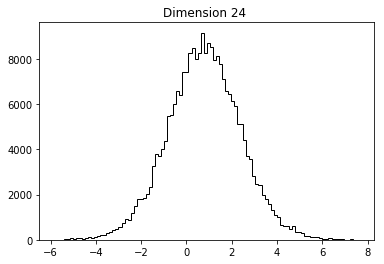

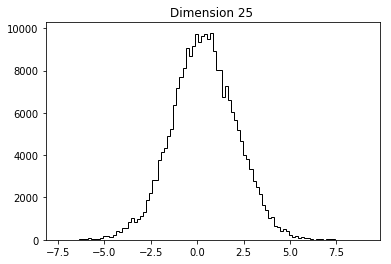

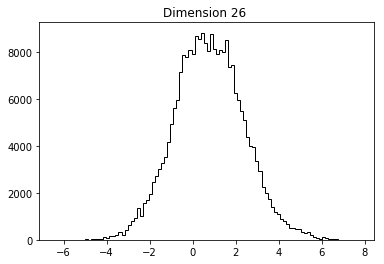

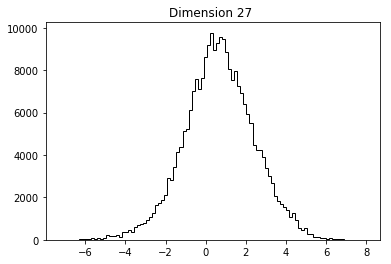

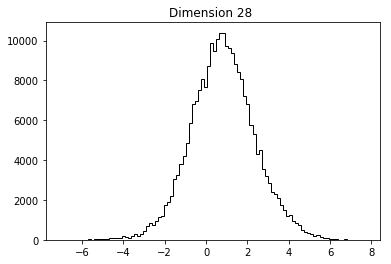

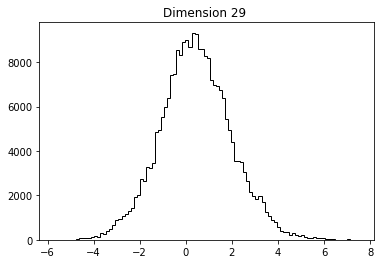

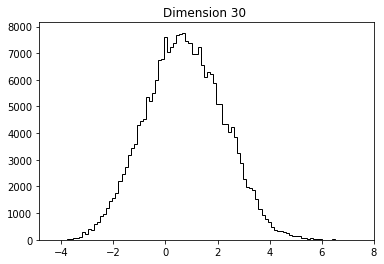

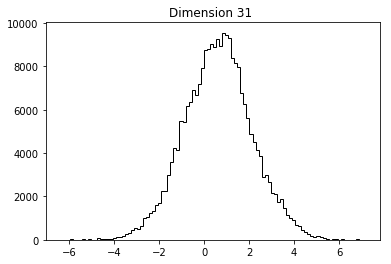

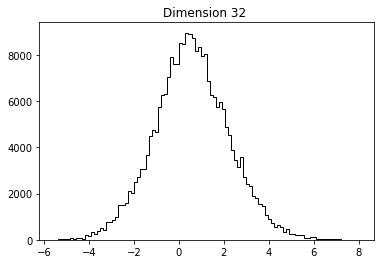

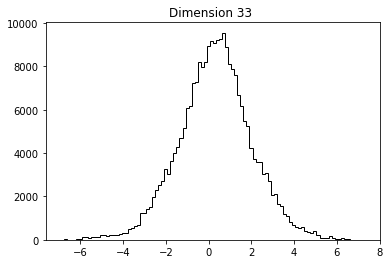

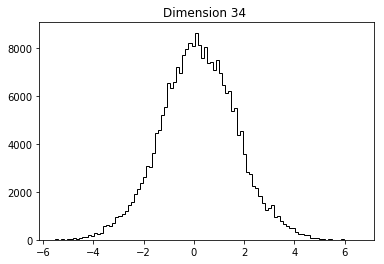

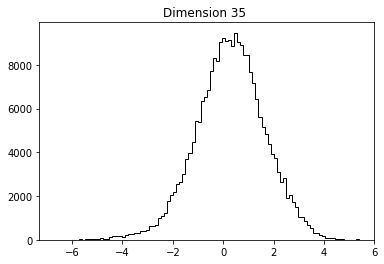

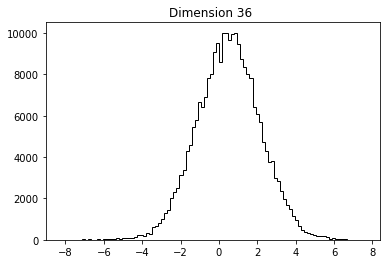

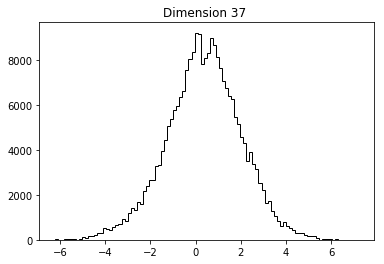

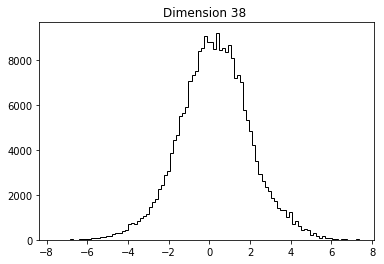

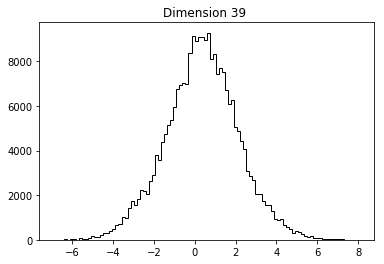

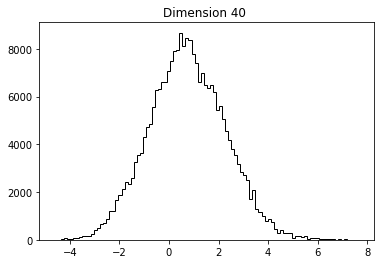

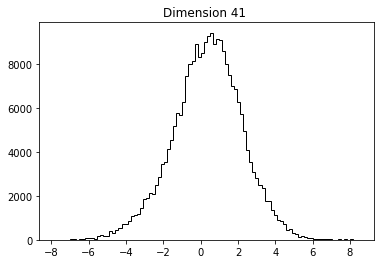

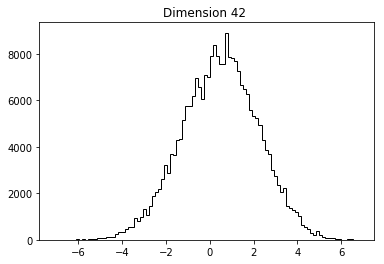

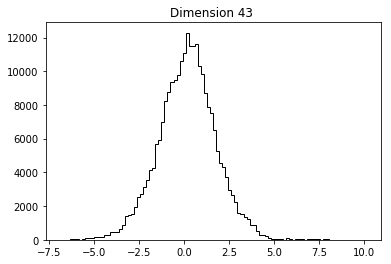

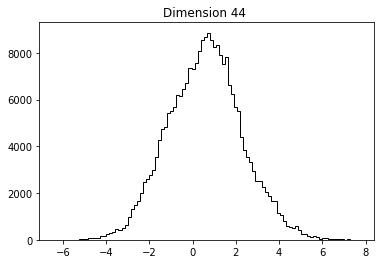

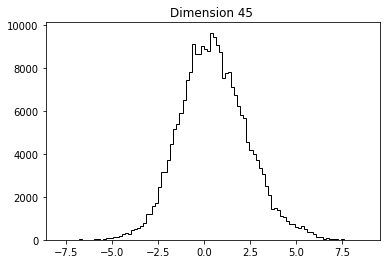

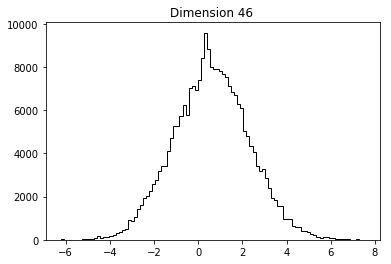

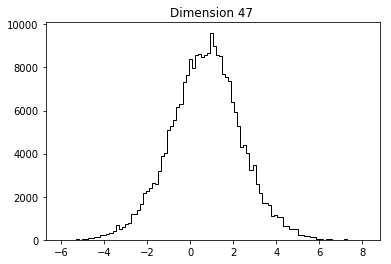

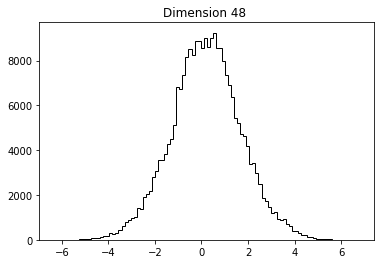

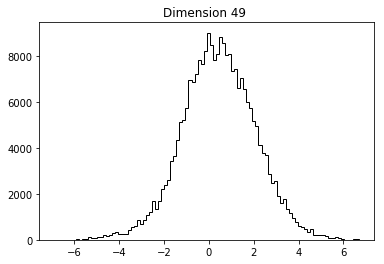

In [21]:
import matplotlib.pyplot as pl

for i in range(ndim):
    pl.figure()
    pl.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    pl.title("Dimension {0:d} ".format(i))
    
pl.show()

In [22]:
print("Mean acceptance fraction: {0:.3f}"
      .format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.189


In [24]:
import numpy as np
# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y)*np.random.randn(N)
y += yerr*np.random.randn(N)